# Question 1

In [2]:
# Importation des librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import argparse

# b
from arch import arch_model

# d 
from scipy import stats
from scipy.stats import chi2

In [3]:
import warnings
warnings.filterwarnings('ignore')

## a

In [4]:
df_bitcoin = pd.read_csv('coin_Bitcoin.csv')
print(f"Dimensions du dataset: {df_bitcoin.shape}")

print(df_bitcoin)

Dimensions du dataset: (2862, 10)
       SNo     Name Symbol              Date          High           Low  \
0        1  Bitcoin    BTC  2013-04-29 23:59    147.488007    134.000000   
1        2  Bitcoin    BTC  2013-04-30 23:59    146.929993    134.050003   
2        3  Bitcoin    BTC  2013-05-01 23:59    139.889999    107.720001   
3        4  Bitcoin    BTC  2013-05-02 23:59    125.599998     92.281898   
4        5  Bitcoin    BTC  2013-05-03 23:59    108.127998     79.099998   
...    ...      ...    ...               ...           ...           ...   
2857  2858  Bitcoin    BTC  2021-02-23 23:59  54204.929760  45290.590270   
2858  2859  Bitcoin    BTC  2021-02-24 23:59  51290.136690  47213.498160   
2859  2860  Bitcoin    BTC  2021-02-25 23:59  51948.966980  47093.853020   
2860  2861  Bitcoin    BTC  2021-02-26 23:59  48370.785260  44454.842110   
2861  2862  Bitcoin    BTC  2021-02-27 23:59  48253.270100  45269.025770   

              Open         Close        Volume     Ma

In [5]:
# Rendements quotidiens
df_bitcoin['Returns'] = df_bitcoin['Close'].pct_change()

print(f"Observations avant rendements: {df_bitcoin.shape[0]}")
print(f"Valeurs manquantes après calcul des rendements: {df_bitcoin['Returns'].isna().sum()}")

# Suppression observations manquantes
df_bitcoin = df_bitcoin.dropna(subset=['Returns']).reset_index(drop=True)

print(f"\nObservations après nettoyage: {df_bitcoin.shape[0]}")
print(f"Valeurs manquantes après nettoyage: {df_bitcoin['Returns'].isna().sum()}")

Observations avant rendements: 2862
Valeurs manquantes après calcul des rendements: 1

Observations après nettoyage: 2861
Valeurs manquantes après nettoyage: 0


In [22]:
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Returns
0,2,Bitcoin,BTC,2013-04-30 23:59:00,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,-0.038328
1,3,Bitcoin,BTC,2013-05-01 23:59:00,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,-0.158345
2,4,Bitcoin,BTC,2013-05-02 23:59:00,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,-0.100692
3,5,Bitcoin,BTC,2013-05-03 23:59:00,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,-0.070906
4,6,Bitcoin,BTC,2013-05-04 23:59:00,115.000000,92.500000,98.099998,112.500000,0.000000e+00,1.250317e+09,0.150895
...,...,...,...,...,...,...,...,...,...,...,...
2856,2858,Bitcoin,BTC,2021-02-23 23:59:00,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11,-0.099302
2857,2859,Bitcoin,BTC,2021-02-24 23:59:00,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11,0.018042
2858,2860,Bitcoin,BTC,2021-02-25 23:59:00,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11,-0.052539
2859,2861,Bitcoin,BTC,2021-02-26 23:59:00,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11,-0.016013


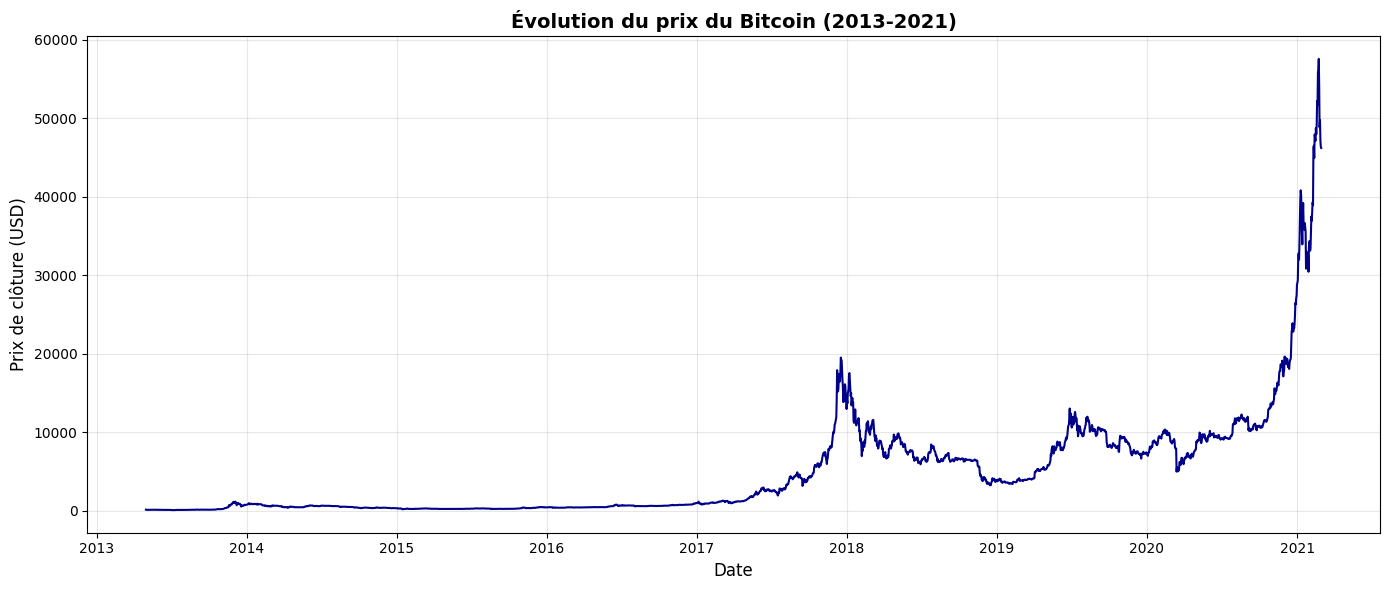

In [23]:
# Graphique de l'évolution du prix du Bitcoin
plt.figure(figsize=(14, 6))
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'], linewidth=1.5, color='darkblue')
plt.title('Évolution du prix du Bitcoin (2013-2021)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix de clôture (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# Statistiques descriptives des rendements
print(" Statistiques descriptives des rendements quotidiens")
print(df_bitcoin['Returns'].describe())
print(f"\nSkewness: {df_bitcoin['Returns'].skew():.4f}")
print(f"Kurtosis: {df_bitcoin['Returns'].kurtosis():.4f}")

 Statistiques descriptives des rendements quotidiens
count    2861.000000
mean        0.002922
std         0.042496
min        -0.371695
25%        -0.012405
50%         0.001919
75%         0.018529
max         0.429680
Name: Returns, dtype: float64

Skewness: 0.2614
Kurtosis: 10.8195


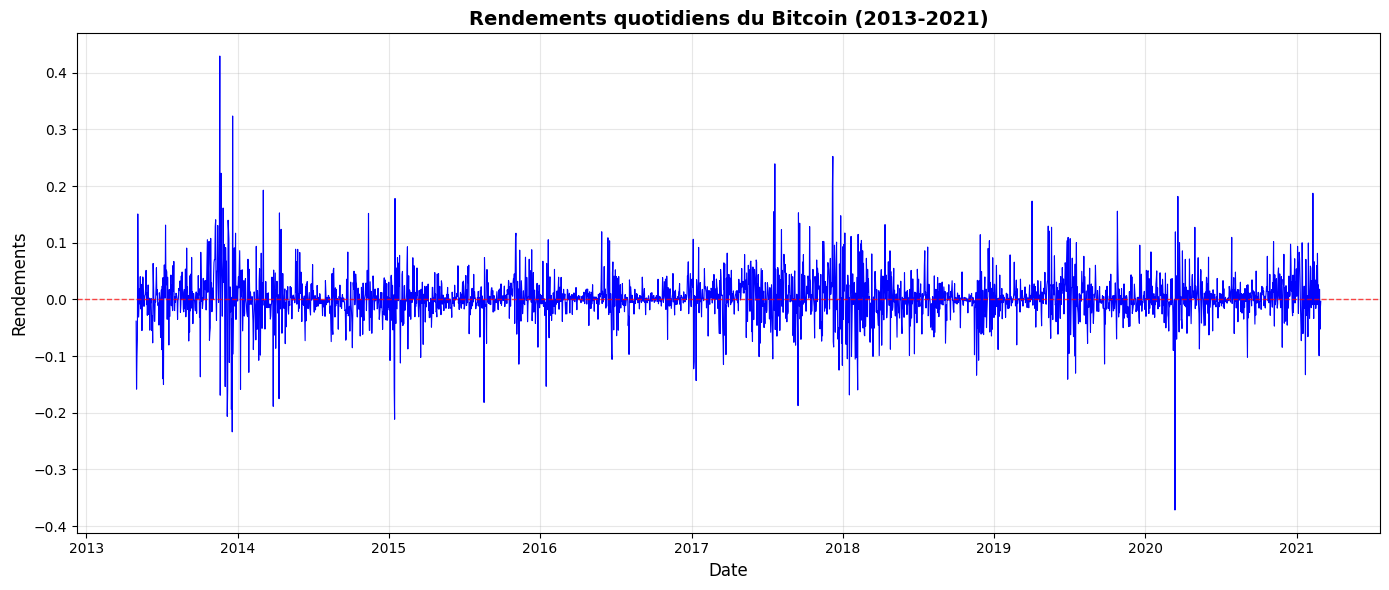

In [9]:
# Graphique rendements quotidiens
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

plt.figure(figsize=(14, 6))
plt.plot(df_bitcoin['Date'], df_bitcoin['Returns'], linewidth=0.8, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.title('Rendements quotidiens du Bitcoin (2013-2021)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rendements', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## b

In [10]:
# Modèle AR(2)-GARCH(1,1)
returns_pct = df_bitcoin['Returns'] * 100

model = arch_model(returns_pct, 
                   mean='AR',          
                   lags=2,              
                   vol='GARCH',         
                   p=1,                 
                   q=1,                 
                   dist='normal')       

# Estimation modèle
results = model.fit(disp='off')

print(results.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                Returns   R-squared:                      -0.002
Mean Model:                        AR   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -7798.33
Distribution:                  Normal   AIC:                           15608.7
Method:            Maximum Likelihood   BIC:                           15644.4
                                        No. Observations:                 2859
Date:                Mon, Dec 15 2025   Df Residuals:                     2856
Time:                        18:12:31   Df Model:                            3
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.1944  5.915e-02      3.287  1.012e

In [26]:
# Tableau résultats
params = results.params
std_err = results.std_err
pvalues = results.pvalues

results_table = pd.DataFrame({
    'Paramètre': params.index,
    'Coefficient': params.values,
    'Erreur Standard (robuste)': std_err.values,
    'Valeur p': pvalues.values,
    'Significativité': ['***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.10 else '' 
                        for p in pvalues.values]
})

print(f"\nLog-Likelihood: {results.loglikelihood:.4f}")
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")
print("*** significatif à 1%, ** significatif à 5%, * significatif à 10%")

print(results_table)


Log-Likelihood: -7798.3282
AIC: 15608.6564
BIC: 15644.4058
*** significatif à 1%, ** significatif à 5%, * significatif à 10%
    Paramètre  Coefficient  Erreur Standard (robuste)       Valeur p  \
0       Const     0.194441                   0.059151   1.011976e-03   
1  Returns[1]    -0.001836                   0.027168   9.461320e-01   
2  Returns[2]     0.028816                   0.022534   2.009698e-01   
3       omega     0.711225                   0.275864   9.932486e-03   
4    alpha[1]     0.142627                   0.035448   5.731616e-05   
5     beta[1]     0.829453                   0.035587  3.711196e-120   

  Significativité  
0             ***  
1                  
2                  
3             ***  
4             ***  
5             ***  


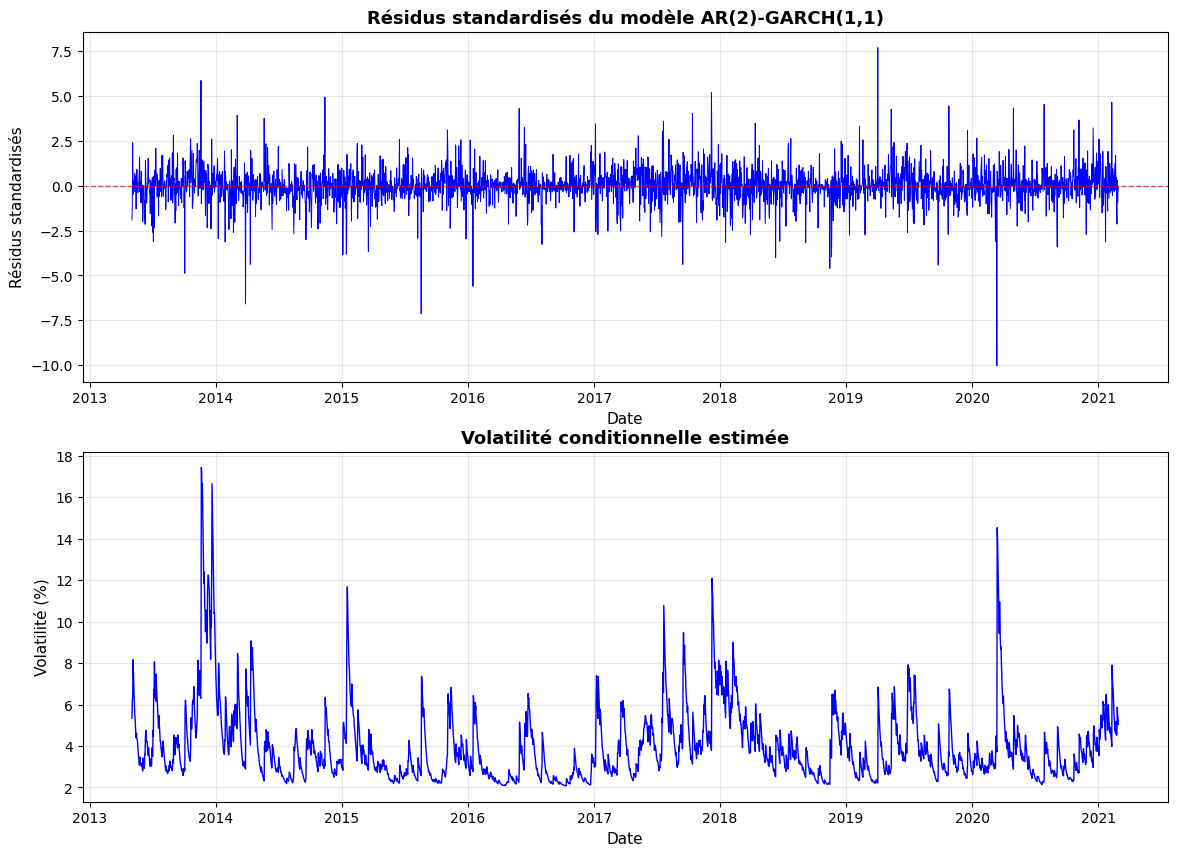

In [12]:
standardized_residuals = results.std_resid
conditional_volatility = results.conditional_volatility

# Alignement dates et résidus (perte 2 observations à cause AR(2))
dates = df_bitcoin['Date'].values

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Graphique résidus standardisés
axes[0].plot(dates, standardized_residuals, linewidth=0.7, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[0].set_title('Résidus standardisés du modèle AR(2)-GARCH(1,1)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Résidus standardisés', fontsize=11)
axes[0].grid(True, alpha=0.3)   

# Graphique volatilité conditionnelle
axes[1].plot(dates, conditional_volatility, linewidth=1, color='blue')
axes[1].set_title('Volatilité conditionnelle estimée', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Volatilité (%)', fontsize=11)
axes[1].grid(True, alpha=0.3)


## c

In [27]:
# Erreurs standard robustes vs. matrice d'information
params = results.params
std_err_robust = results.std_err 
tvalues_robust = results.tvalues 

# Réestimation sans correction robuste
model_non_robust = arch_model(returns_pct, 
                               mean='AR', 
                               lags=2, 
                               vol='GARCH', 
                               p=1, 
                               q=1, 
                               dist='normal')

results_non_robust = model_non_robust.fit(disp='off', cov_type='classic')

std_err_classic = results_non_robust.std_err  
tvalues_classic = results_non_robust.tvalues  

# Tableau comparatif
comparison_table = pd.DataFrame({
    'Paramètre': params.index,
    'Coefficient': params.values,
    'SE Robuste': std_err_robust.values,
    't-stat Robuste': tvalues_robust.values,
    'SE Classique': std_err_classic.values,
    't-stat Classique': tvalues_classic.values,
    'Ratio t-stat (C/R)': tvalues_classic.values / tvalues_robust.values,
    'Diff. t-stat': tvalues_robust.values - tvalues_classic.values
})

print(comparison_table)

    Paramètre  Coefficient  SE Robuste  t-stat Robuste  SE Classique  \
0       Const     0.194441    0.059151        3.287176      0.060966   
1  Returns[1]    -0.001836    0.027168       -0.067565      0.022076   
2  Returns[2]     0.028816    0.022534        1.278794      0.022245   
3       omega     0.711225    0.275864        2.578171      0.109623   
4    alpha[1]     0.142627    0.035448        4.023596      0.016340   
5     beta[1]     0.829453    0.035587       23.307615      0.016977   

   t-stat Classique  Ratio t-stat (C/R)  Diff. t-stat  
0          3.189328            0.970233      0.097848  
1         -0.083146            1.230615      0.015581  
2          1.295432            1.013011     -0.016638  
3          6.487926            2.516484     -3.909755  
4          8.728968            2.169444     -4.705372  
5         48.857628            2.096209    -25.550014  


## d

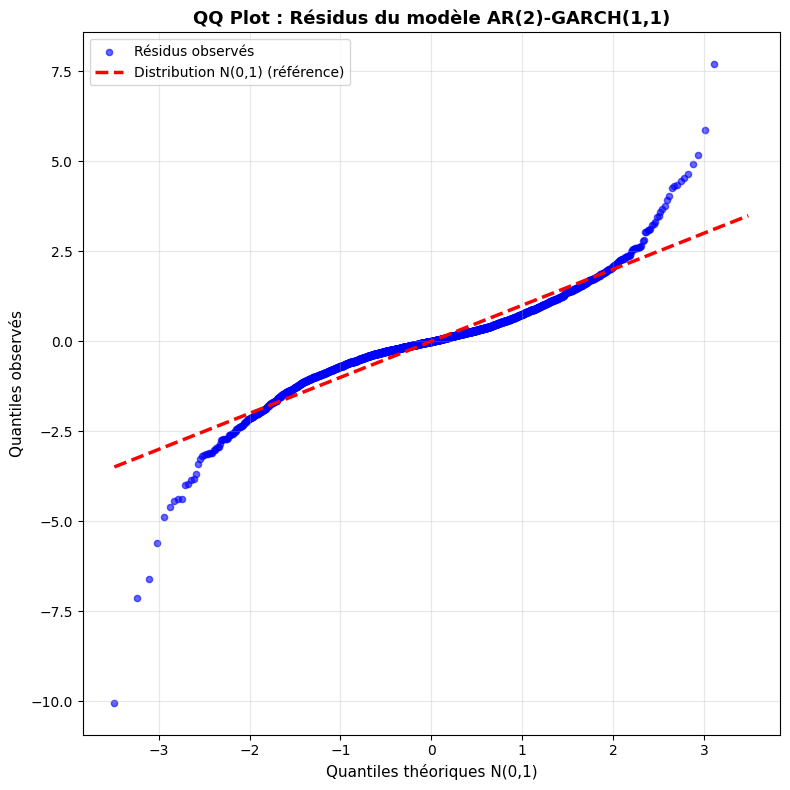

In [14]:
# Graphique QQ 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

(quantiles_theor, quantiles_obs), (slope, intercept, r) = stats.probplot(standardized_residuals, dist="norm")

ax.scatter(quantiles_theor, quantiles_obs, alpha=0.6, s=20, color='blue', label='Résidus observés')

# Ligne de référence distribution normale (0,1)
min_val = min(quantiles_theor.min(), quantiles_obs.min())
max_val = max(quantiles_theor.max(), quantiles_obs.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2.5, label='Distribution N(0,1) (référence)', zorder=10)

ax.set_title('QQ Plot : Résidus du modèle AR(2)-GARCH(1,1)', fontsize=13, fontweight='bold')
ax.set_xlabel('Quantiles théoriques N(0,1)', fontsize=11)
ax.set_ylabel('Quantiles observés', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

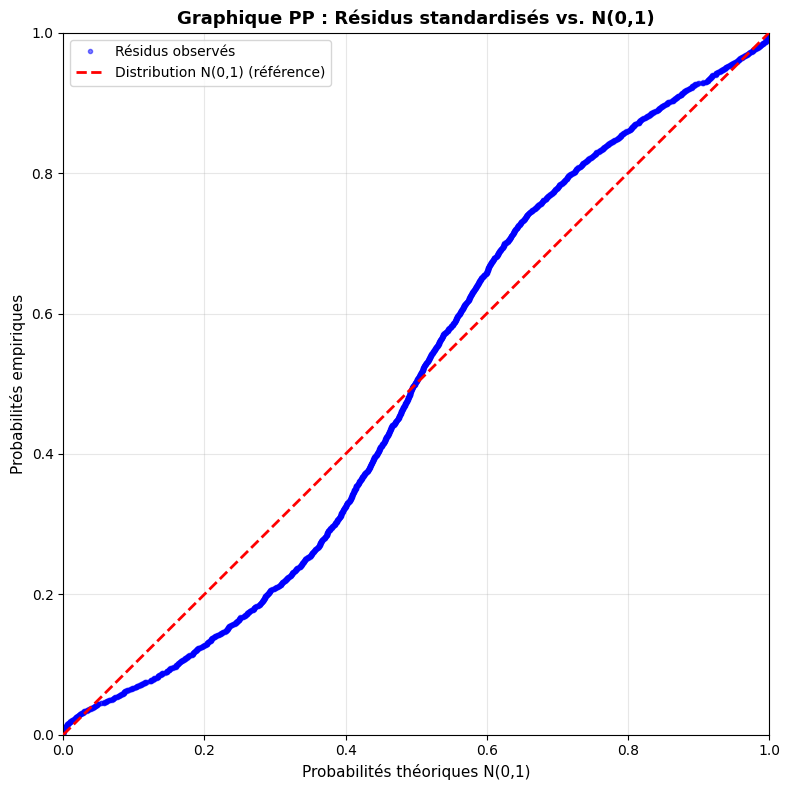

In [15]:
# Graphique PP
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sorted_residuals = np.sort(standardized_residuals)
n = len(sorted_residuals)
empirical_probs = (np.arange(1, n + 1) - 0.5) / n  
theoretical_probs = stats.norm.cdf(sorted_residuals)  

ax.plot(theoretical_probs, empirical_probs, 'o', markersize=3, alpha=0.5, color='blue', label='Résidus observés')
ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Distribution N(0,1) (référence)', zorder=10)  
ax.set_title('Graphique PP : Résidus standardisés vs. N(0,1)', fontsize=13, fontweight='bold')
ax.set_xlabel('Probabilités théoriques N(0,1)', fontsize=11)
ax.set_ylabel('Probabilités empiriques', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

## e

In [16]:
# Modèle AR(2)-GARCH(1,1) avec distribution Student-t
model_t = arch_model(returns_pct, 
                     mean='AR', 
                     lags=2, 
                     vol='GARCH', 
                     p=1, 
                     q=1, 
                     dist='t') 

results_t = model_t.fit(disp='off')

print(results_t.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                      Returns   R-squared:                      -0.002
Mean Model:                              AR   Adj. R-squared:                 -0.002
Vol Model:                            GARCH   Log-Likelihood:               -7372.45
Distribution:      Standardized Student's t   AIC:                           14758.9
Method:                  Maximum Likelihood   BIC:                           14800.6
                                              No. Observations:                 2859
Date:                      Mon, Dec 15 2025   Df Residuals:                     2856
Time:                              18:12:32   Df Model:                            3
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------

In [17]:
# Test de rapport de vraisemblance (LR)
# H0: Distribution normale
# H1: Distribution Student-t

lr_stat = 2 * (results_t.loglikelihood - results.loglikelihood)
p_value = 1 - chi2.cdf(lr_stat, df=1)

print("Résultat du test de rapport de vraisemblance:")
print(f"Log-Likelihood (Normal):    {results.loglikelihood:.4f}")
print(f"Log-Likelihood (Student-t): {results_t.loglikelihood:.4f}")
print(f"\nStatistique LR: {lr_stat:.4f}")
print(f"Valeur p:       {p_value:.6f}")

print("\nConclusion:")
if p_value < 0.01:
    print(f"Rejet de H0 au seuil de 1%")
else:
    print(f"Non rejet de H0")

Résultat du test de rapport de vraisemblance:
Log-Likelihood (Normal):    -7798.3282
Log-Likelihood (Student-t): -7372.4459

Statistique LR: 851.7647
Valeur p:       0.000000

Conclusion:
Rejet de H0 au seuil de 1%


## f

In [18]:
# Modèle AR(2)-EGARCH(1,1,1) avec distribution en t
model_egarch = arch_model(returns_pct, 
                          mean='AR', 
                          lags=2, 
                          vol='EGARCH',  
                          p=1,          
                          o=1,           
                          q=1,           
                          dist='t')     

results_egarch = model_egarch.fit(disp='off')

print(results_egarch.summary())

                             AR - EGARCH Model Results                              
Dep. Variable:                      Returns   R-squared:                      -0.003
Mean Model:                              AR   Adj. R-squared:                 -0.003
Vol Model:                           EGARCH   Log-Likelihood:               -7345.58
Distribution:      Standardized Student's t   AIC:                           14707.2
Method:                  Maximum Likelihood   BIC:                           14754.8
                                              No. Observations:                 2859
Date:                      Mon, Dec 15 2025   Df Residuals:                     2856
Time:                              18:12:32   Df Model:                            3
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------

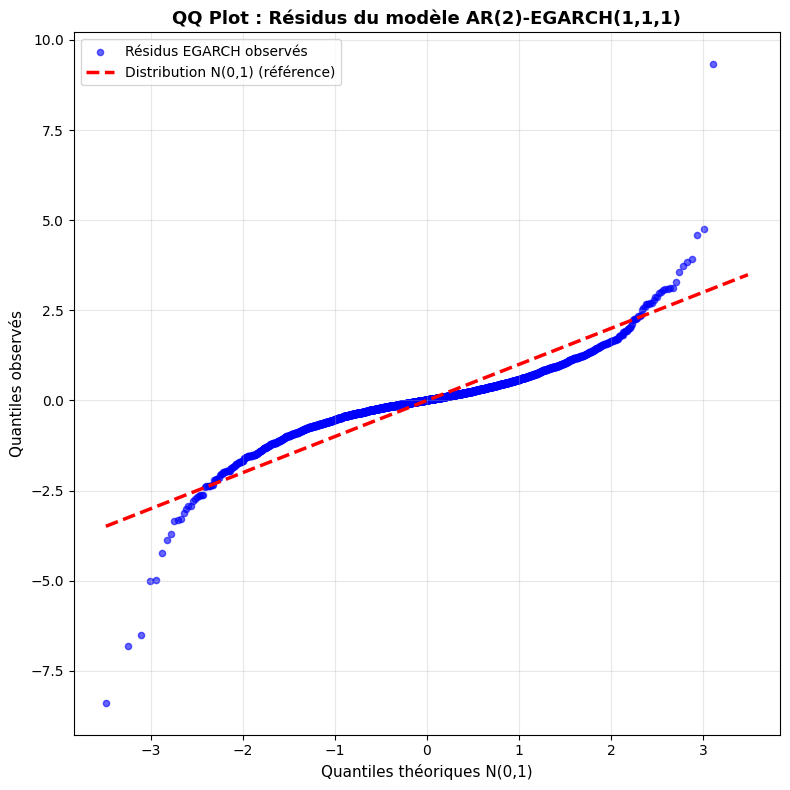

In [19]:
# Résidus standardisés du modèle EGARCH
standardized_residuals_egarch = results_egarch.std_resid

# Graphique QQ plot EGARCH
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

(quantiles_theor_egarch, quantiles_obs_egarch), (slope_e, intercept_e, r_e) = stats.probplot(standardized_residuals_egarch, dist="norm")

ax.scatter(quantiles_theor_egarch, quantiles_obs_egarch, alpha=0.6, s=20, color='blue', label='Résidus EGARCH observés')

# Ligne de référence distribution normale (0,1)
min_val_e = min(quantiles_theor_egarch.min(), quantiles_obs_egarch.min())
max_val_e = max(quantiles_theor_egarch.max(), quantiles_obs_egarch.max())
ax.plot([min_val_e, max_val_e], [min_val_e, max_val_e], 'r--', linewidth=2.5, label='Distribution N(0,1) (référence)', zorder=10)

ax.set_title('QQ Plot : Résidus du modèle AR(2)-EGARCH(1,1,1)', fontsize=13, fontweight='bold')
ax.set_xlabel('Quantiles théoriques N(0,1)', fontsize=11)
ax.set_ylabel('Quantiles observés', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

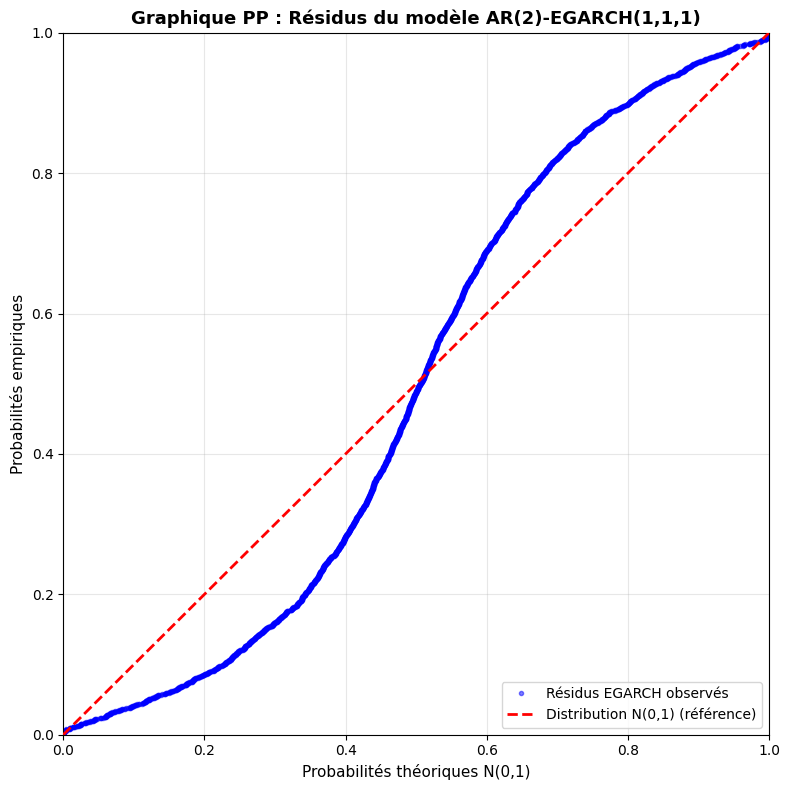

In [20]:
# Graphique PP plot EGARCH
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sorted_residuals_egarch = np.sort(standardized_residuals_egarch)
n_egarch = len(sorted_residuals_egarch)
empirical_probs_egarch = (np.arange(1, n_egarch + 1) - 0.5) / n_egarch
theoretical_probs_egarch = stats.norm.cdf(sorted_residuals_egarch)

ax.plot(theoretical_probs_egarch, empirical_probs_egarch, 'o', markersize=3, alpha=0.5, color='blue', label='Résidus EGARCH observés')
ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Distribution N(0,1) (référence)', zorder=10)
ax.set_title('Graphique PP : Résidus du modèle AR(2)-EGARCH(1,1,1)', fontsize=13, fontweight='bold')
ax.set_xlabel('Probabilités théoriques N(0,1)', fontsize=11)
ax.set_ylabel('Probabilités empiriques', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=10)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

## g

In [21]:
# Tableau comparatif AIC et BIC de tous modèles GARCH
comparison = pd.DataFrame({
    'Modèle': ['GARCH-Normal', 'GARCH-t', 'EGARCH-t'],
    'AIC': [results.aic, results_t.aic, results_egarch.aic],
    'BIC': [results.bic, results_t.bic, results_egarch.bic]
})

print("Comparaison des trois modèles GARCH, GARCH-t et EGARCH-t:")
print(comparison.to_string(index=False))

print(f"\nMeilleur modèle, soit celui avec les AIC et BIC les plus faibles: {comparison.loc[comparison['AIC'].idxmin(), 'Modèle']}")

Comparaison des trois modèles GARCH, GARCH-t et EGARCH-t:
      Modèle          AIC          BIC
GARCH-Normal 15608.656423 15644.405786
     GARCH-t 14758.891773 14800.599364
    EGARCH-t 14707.161416 14754.827233

Meilleur modèle, soit celui avec les AIC et BIC les plus faibles: EGARCH-t
